

Welcome! In this interactive coding session, we will go over some of the basic concepts in neurotechnology, together with some techniques for using neural data to predict behavior.

<img src="https://drive.google.com/uc?export=view&id=170yeA7ct0RqD1g-8qRKQSuiHND1foW-a" alt="drawing" width="800"/>

First, let's make sure that we have all necessary packages, and install any that we will need.

In [1]:
!pip install -q ipympl

import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.7 MB/s eta 0:00:00


# Recording signals from the brain


## Voltage Recordings
Let's first take a look at a simulated voltage recording from an electrode with 3 neurons nearby. Run the code below and use the sliders to change the firing rate and distance of each neuron.

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

plt.close('all')

# a waveform shape for a spike
waveform = np.array([0.0, -0.6, -1, -0.8, 0.2, 0.8, 0.7, 0.4, 0.2, 0.1, 0])
waveform_length = len(waveform)

def generate_spikes(rate, T):
    """Generate spike times for a given rate over duration T."""
    # use a poisson distribution to generate spike times
    num_spikes = np.random.poisson(rate * T)
    return np.sort(np.random.rand(num_spikes) * T)

def generate_voltage_trace(spikes, distances, T, dt):
    """Generate voltage trace based on spike times and distances, with a white noise baseline."""
    # start with just noise on the recording
    trace = np.random.normal(0, 0.05, int(T/dt))

    # place spikes on the waveform at the times in neuron_spikes
    for neuron_spikes, distance in zip(spikes, distances):
        for spike_time in neuron_spikes:
            idx = int(spike_time / dt)
            if idx < len(trace) - len(waveform):
                trace[idx:idx+len(waveform)] += waveform / distance
    return trace

def simulate_neurons(rate1=10, distance1=1, rate2=10, distance2=1, rate3=10, distance3=1):
    T = 0.5  # total time in seconds
    dt = 0.001  # sampling interval

    rates = [rate1, rate2, rate3]
    distances = [distance1, distance2, distance3]

    # Create a list of indices sorted by distance (the smallest amplitude neuron is plotted first)
    sorted_indices = np.argsort(distances)[::-1]
    spikes = [generate_spikes(rates[i], T) for i in range(3)]
    voltage_trace = generate_voltage_trace(spikes, distances, T, dt)

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    colors = ['r', 'g', 'b']

    # Visualizing the electrode and the relative distances of each neuron
    electrode_pos = (0, 0)
    axs[0].axvline(x=0, ymin=0.6, ymax=1, color='k', linewidth=10, label="Electrode")
    axs[0].scatter(*electrode_pos, s=170, c='k', marker="v", label="Electrode")
    for i, distance in enumerate(distances):
        axs[0].scatter(distance, 0, s=150, c=colors[i], alpha=0.5, label=f"Neuron {i+1}")
    axs[0].set_ylim(-1, 1)
    axs[0].set_xlim(-4, 12)
    axs[0].set_xlabel("Distance (a.u.)")
    axs[0].set_aspect('equal', 'box')
    axs[0].set_title("Relative Distances from Electrode")
    axs[0].get_yaxis().set_visible(False)
    axs[0].legend()

    # Plotting the voltage trace
    times = np.arange(0, T, dt)
    axs[1].plot(times, voltage_trace, 'k-', lw=0.5)  # base trace

    # Coloring the trace based on neuron
    for i in sorted_indices:
        spike_times = spikes[i]
        color = colors[i]
        for spike_time in spike_times:
            idx = int(spike_time / dt)
            if idx < len(voltage_trace) - waveform_length:
                axs[1].plot(times[idx:idx+waveform_length], voltage_trace[idx:idx+waveform_length], color=color, lw=2)

    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Voltage (a.u.)")
    axs[1].set_title("Simulated Electrode Recording")

    # # Plotting threshold crossings
    # threshold = -2.0 * np.sqrt(np.mean(voltage_trace**2))
    # times = np.arange(0, T, dt)
    # axs[2].plot(times, voltage_trace, 'k-', lw=0.5)  # base trace
    # crossings = np.where(voltage_trace < threshold)[0]
    # refractory_period = 5  # in samples
    # valid_crossings = []
    # if crossings.size > 0:
    #     valid_crossings.append(crossings[0])
    #     for i in range(1, len(crossings)):
    #         if crossings[i] - crossings[i - 1] > refractory_period:
    #             valid_crossings.append(crossings[i])
    # for idx in valid_crossings:
    #     axs[2].axvline(x=idx*dt, color='k', lw=1.5)

    # axs[2].axhline(y=threshold, color='k', lw=1.5, linestyle='--', label='Threshold')
    # axs[2].set_title("Threshold Crossings")
    # axs[2].set_xlabel("Time (s)")
    # axs[2].set_ylabel("Voltage (a.u.)")
    # axs[2].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Creating the interactive sliders
interactive_plot = interactive(
    simulate_neurons,
    rate1=FloatSlider(min=5, max=50, step=1, value=10, description="Rate 1 (Hz)", continuous_update=False, style={'handle_color': 'red'}),
    distance1=FloatSlider(min=0.1, max=10, step=0.1, value=2, description="Distance 1", continuous_update=False, style={'handle_color': 'red'}),
    rate2=FloatSlider(min=5, max=50, step=1, value=10, description="Rate 2 (Hz)", continuous_update=False, style={'handle_color': 'green'}),
    distance2=FloatSlider(min=0.1, max=10, step=0.1, value=4, description="Distance 2", continuous_update=False, style={'handle_color': 'green'}),
    rate3=FloatSlider(min=5, max=50, step=1, value=10, description="Rate 3 (Hz)", continuous_update=False, style={'handle_color': 'blue'}),
    distance3=FloatSlider(min=0.1, max=10, step=0.1, value=7, description="Distance 3", continuous_update=False, style={'handle_color': 'blue'})
)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Rate 1 (Hz)', max=50.0, mi…

In the plots above, notice how the the black voltage line is a sum of the spikes from each neuron and noise. If the spikes weren't labelled with color, could you determine which neuron is firing?

<!-- The 3rd plot shows "threshold crossings", a common way to detect when any neuron is firing. -->
<!-- <br> -->
<br>

Play around with the settings and try to answer the following questions:

- How does the distance from electrode impact the spike amplitude?
- What are some ways you might detect when a neuron is firing? (imagine you're writing code for this)
<!-- - In what cases does threshold crossings accurately detect all the spikes? When is innaccurate? (consider when one spike has a much bigger amplitude than others, or when all amplitudes are low) -->
<br>

## Spike Sorting

Spike sorting let's us classify which neuron a spike came from, just like labelling the colors in the previous plot. Once we know which neuron is firing, we can calculate it's firing rate over time to use as a decoding feature.

Let's start by loading in some spike snippets. This dataset contains spikes extracted from a single voltage recording - there may be one or more spikes, and some waveforms may just be noise

The `spikes` variable is an array of shape [NumSpikeSamples x 32 timepoints].

In [3]:
!gdown https://drive.google.com/uc?id=15emKf43tLL9S1mivfM3fkTcG6P1n8JXs

Downloading...
From (original): https://drive.google.com/uc?id=15emKf43tLL9S1mivfM3fkTcG6P1n8JXs
From (redirected): https://drive.google.com/uc?id=15emKf43tLL9S1mivfM3fkTcG6P1n8JXs&confirm=t&uuid=3f3d8aca-8525-4988-b96e-3dd3d1cc5c71
To: /content/spikes.mat
100% 9.69M/9.69M [00:00<00:00, 50.8MB/s]


In [4]:
# %matplotlib --list

%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

(41568, 32)


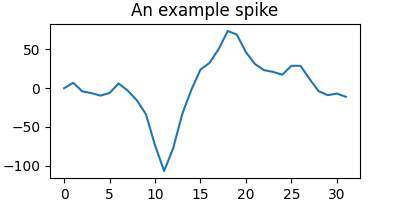

In [5]:
# now load in the spikes.mat file
from scipy.io import loadmat
spikes = loadmat('/content/spikes.mat')['spikes']

print(spikes.shape)

# plot one spike
plt.figure(figsize=(4,2))
plt.plot(spikes[3, :])
plt.title('An example spike')
plt.ylabel('Voltage (uV)')
plt.xlabel('timestep')
plt.show()

Principal Component Analysis (PCA) is a dimensionality reduction technique that can capture the most significant patterns in the data. In the context of spike sorting, we can use PCA to represent our spike waveforms in a 2D space where similar spikes are close to each other. This visualization aids in understanding the distribution of spikes and, potentially, distinguishing between spikes from different neurons.

Let's start by visualizing our spike waveforms in PCA space:

In [6]:
from sklearn.decomposition import PCA

# perform PCA
pca = PCA(n_components=2)
spikes_pca = pca.fit_transform(spikes)

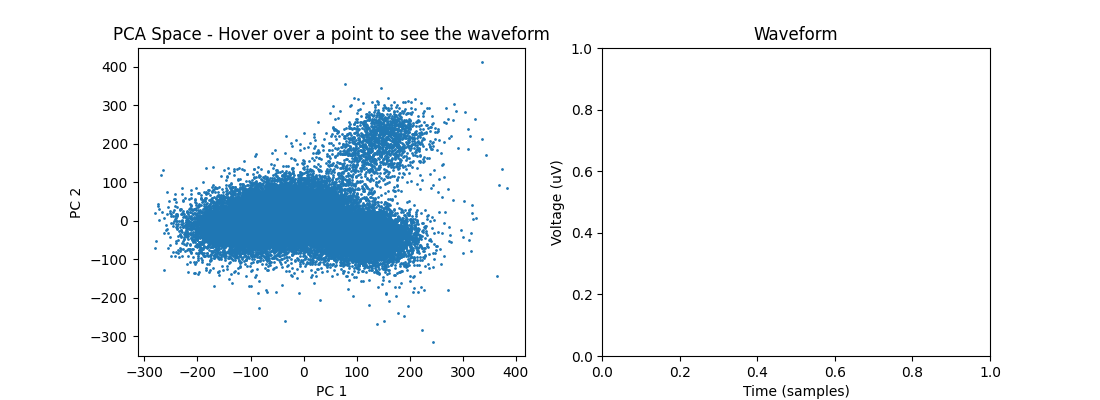

In [7]:
# make an interactive plot
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
sc = ax[0].scatter(spikes_pca[:, 0], spikes_pca[:, 1], s=1)

def on_motion(event):
    if event.inaxes == ax[0]:
        distances = np.sum((spikes_pca - np.array([event.xdata, event.ydata]))**2, axis=1)
        nearest = np.argmin(distances)
        ax[1].clear()
        ax[1].plot(spikes[nearest])
        ax[1].set_ylim(-200, 200)
        ax[1].set_title("Waveform")
        ax[1].set_xlabel("Time (samples)")
        ax[1].set_ylabel("Voltage (uV)")
        plt.draw()

fig.canvas.mpl_connect('motion_notify_event', on_motion)
ax[0].set_title("PCA Space - Hover over a point to see the waveform")
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")

ax[1].set_title("Waveform")
ax[1].set_xlabel("Time (samples)")
ax[1].set_ylabel("Voltage (uV)")

plt.show()

To formally group these spikes, we can use a clustering algorithm. One of the most commonly used algorithms for this purpose is K-means clustering.

K-means clustering tries to partition our data into 'k' clusters where each spike belongs to the cluster with the nearest mean.

Let's run K-means clustering on our data and visualize the resulting clusters:

In [ ]:
from sklearn.cluster import KMeans

# run kmeans
n_clusters = 3      # how many clusters do we assume there are?
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(spikes)

In [ ]:
# plot the clusters
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
for i in range(n_clusters):
    mask = labels == i
    ax[0].scatter(spikes_pca[mask, 0], spikes_pca[mask, 1], label=f"Cluster {i}")
    ax[1].plot(spikes[mask].mean(axis=0), label=f"Cluster {i} Mean Waveform")

ax[0].set_title("PCA Space with Clusters")
ax[1].set_title("Mean Waveforms per Cluster")
ax[1].legend()
plt.show()

# Extracting features from the recorded signals

Given a recording from multiple electrodes in the brain, we might want to use it to enable some application (e.g., controlling a cursor in the screen, writing text, producing speech, etc.). These applications are enabled by decoding models that take in neural data and predict an output. To improve the performance of these decoding models, features are extracted from the neural data; this process makes it easier for the models than just receiving raw electric signals on which it may be tough to differentiate signal from noise.

Here, we will cover two neural features: threshold crossings, also referred to as firing rate, and spiking band power (SBP).



## Threshold crossings / Firing rate

This feature is by far the most commonly used feature by decoding models in the literature. The main idea is dividing the data from each channel into time bins and determining how many `threshold crossings` happened during that period.

The threshold used for determining the threshold crossings is usually determined from the data:
1. A few seconds of data from each channel are recorded.
2. The root-mean-square (RMS) value during that time is recorded.
3. The threshold is set to a constant multiplied by the RMS value. For example: $-4.5\cdot RMS$

The threshold crossing can be visualized as a histogram with the number of crossings during each time bin, or as the firing rate over time for each channel. This is also referred to as the threshold crossing rate (TCR).

You won't need to know exactly how to extract the threshold crossings or firing rate from raw neural data, as that will be provided in each dataset, but it is useful for you to understand where the data is coming from.


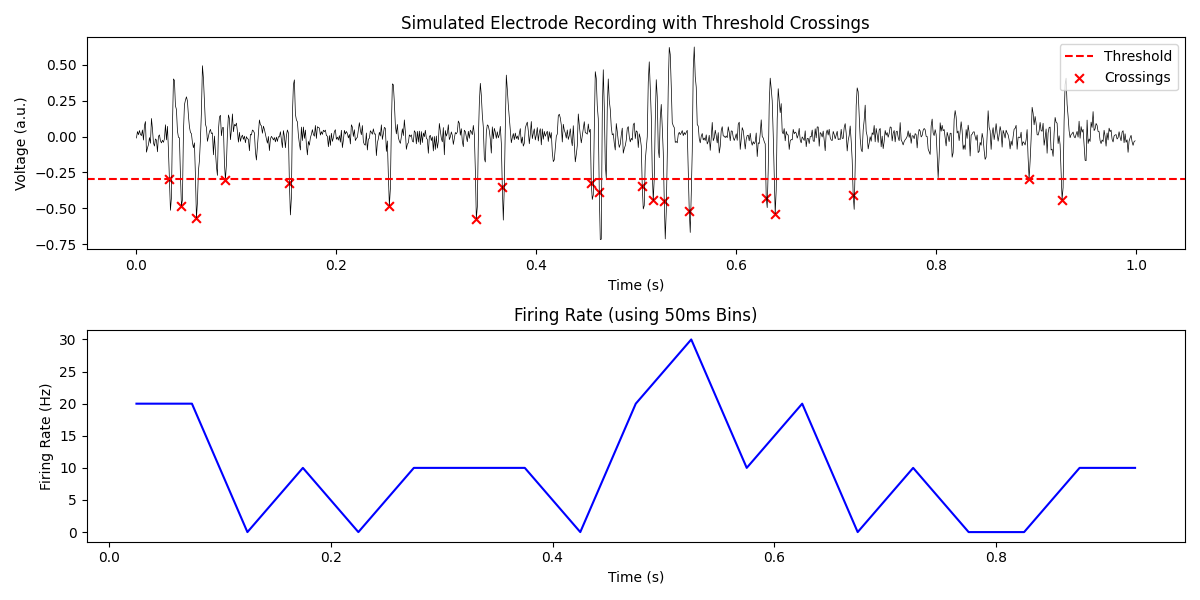

In [10]:
# @title
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

def generate_spikes(rate, T):
    """Generate spike times for a given rate over duration T."""
    num_spikes = np.random.poisson(rate * T)
    return np.sort(np.random.rand(num_spikes) * T)

def generate_voltage_trace(spikes, distances, T, dt):
    """Generate voltage trace based on spike times and distances, with a white noise baseline."""
    trace = np.random.normal(0, 0.05, int(T/dt))  # white noise baseline
    waveform = np.array([0.0, -0.6, -1, -0.8, 0.2, 0.8, 0.7, 0.4, 0.2, 0.1, 0])

    for neuron_spikes, distance in zip(spikes, distances):
        for spike_time in neuron_spikes:
            idx = int(spike_time / dt)
            if idx < len(trace) - len(waveform):
                trace[idx:idx+len(waveform)] += waveform / distance
    return trace

def simulate_neurons():
    T = 1.0  # total time in seconds
    dt = 0.001  # sampling interval

    rates = [20, 10, 10]
    distances = [2, 4, 7]

    spikes = [generate_spikes(rate, T) for rate in rates]
    voltage_trace = generate_voltage_trace(spikes, distances, T, dt)
    threshold = -2.0 * np.sqrt(np.mean(voltage_trace**2))

    # Detect threshold crossings
    below_threshold = np.where((voltage_trace[:-1] >= threshold) & (voltage_trace[1:] < threshold))[0]

    # Calculate moving average of firing rate
    bin_size = int(0.05 / dt)  # 100ms bin
    bins = np.arange(0, len(voltage_trace), bin_size)
    firing_counts, _ = np.histogram(below_threshold, bins=bins)
    firing_rate = firing_counts / 0.1  # Convert spike counts to rate

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # Plotting the voltage trace with threshold crossings
    times = np.arange(0, T, dt)
    axs[0].plot(times, voltage_trace, 'k-', lw=0.5)  # base trace
    axs[0].axhline(y=threshold, color='r', lw=1.5, linestyle='--', label='Threshold')
    axs[0].scatter(times[below_threshold+1], voltage_trace[below_threshold+1], c='r', marker='x', s=40, label='Crossings')
    axs[0].set_title("Simulated Electrode Recording with Threshold Crossings")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Voltage (a.u.)")
    axs[0].legend()

    # Plotting moving average firing rate
    mid_bin_times = 0.5 * (bins[:-1] + bins[1:]) * dt
    axs[1].plot(mid_bin_times, firing_rate, 'b-')
    axs[1].set_title("Firing Rate (using 50ms Bins)")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Firing Rate (Hz)")

    plt.tight_layout()
    plt.show()


simulate_neurons()


## Spiking Band Power (SBP)

(Disclaimer: we use SBP a lot in our lab, and the paper introducing it came from our lab)

Normally, the way neural features are extracted from the raw electrical data is by sampling the data at a high rate (30kHz is common), and then using the threshold to determine each time there is a spike. Unfortunately, this method is power heavy, which hinders the use of decoding models in real-time applications.

Nason et al. (2020) showed that using just the power of the spiking band (300-1000Hz) as a neural feature, a decoder model predicting finger movement in a monkey performed better than with using threshold crossings. Additionally, it can significantly lower power consumption, as the sampling rate can be brought down from 30 to 2kHz.

<img src="https://drive.google.com/uc?export=view&id=15iRvPFoNbAwJXMp8P8BT8kI_pf0BjTOL" alt="drawing" width="600"/>

# Decoding models

Now, to actually use the neural features in an interesting application, we need to decode them! Neural decoding models come in many different flavors, but we can generally separate them by the type of output they generate. **Regression models** take in the neural features and predict some sort of continuous output, such as the movement of a cursor on a screen. **Classification models**, also referred to as **discrete output models**, predict an output which is one out of a finite number of states, such as one letter out of the full alphabet.

<img src="https://drive.google.com/uc?export=view&id=17q3rseK6nDdOGinYNpEDB6h5seNHwBco" alt="drawing" width="800"/>





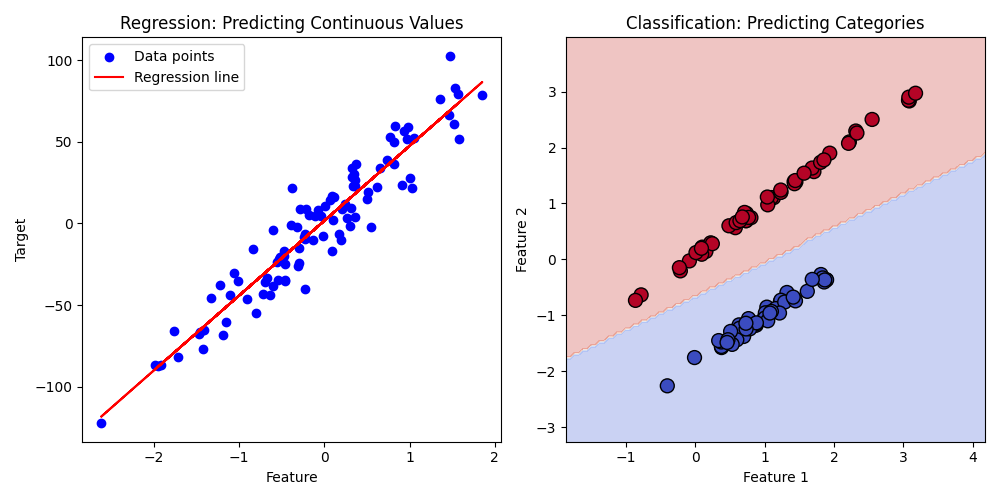

In [46]:
# @title ## Regression vs. Classification
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# Create a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
reg_model = LinearRegression().fit(X_reg, y_reg)
y_pred_reg = reg_model.predict(X_reg)

# Create a synthetic classification dataset
X_class, y_class = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
class_model = LogisticRegression().fit(X_class, y_class)

# Generate decision boundary for classification model
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = class_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Regression plot
ax1.scatter(X_reg, y_reg, color='blue', label="Data points")
ax1.plot(X_reg, y_pred_reg, color='red', label="Regression line")
ax1.set_title("Regression: Predicting Continuous Values")
ax1.set_xlabel("Feature")
ax1.set_ylabel("Target")
ax1.legend()

# Classification plot with decision boundary
ax2.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
ax2.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='coolwarm', edgecolors='k', s=100)
ax2.set_title("Classification: Predicting Categories")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

# Display the plot
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


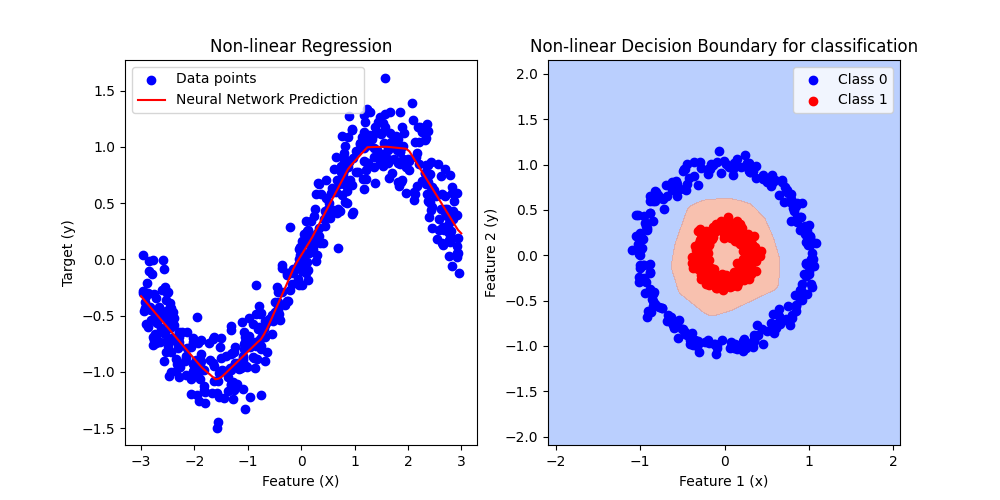

In [47]:
# @title Non-linear Decoding Models


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense


# Create a synthetic non-linear regression dataset
np.random.seed(42)
X = np.random.uniform(-3, 3, 500).reshape(-1, 1)
y = np.sin(X) + 0.2 * np.random.normal(size=X.shape)


# Build a simple neural network model to learn the non-linear regression
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(X, y, epochs=200, verbose=0)

# Predict using the neural network
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot the neural network predictions alongside the original data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X_test, y_pred, color='red', label="Neural Network Prediction")
plt.title("Non-linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()



# Generate a synthetic 2-class dataset where classes are circularly separated
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

# Train a neural network classifier on the original data
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=50, verbose=0)

# Predict and plot decision boundary for the neural network
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

# Plot decision boundary learned by the neural network
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
plt.title("Non-linear Decision Boundary for classification")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()




## Recent examples from the literature

### Regression models

1. **Willsey et al. (2022, Nature Communications)**: they used a feed-forward neural network to predict intended finger movements from a monkey with an intracortical Utah array.

<img src="https://drive.google.com/uc?export=view&id=16lAJqdVQqUrL63PCYUMOWF4Q4hwbt88E" alt="drawing" width="600"/>


2. **Flesher et al. (2021, Science)**: they introduce a bidirectional (sensory and motor) BCI that allows a person with tetraplegia control a robotic limb twice as fast than with just the unidirectional BCI. They used a linear model that predicts movement of the robotic limb from the signals of an intracortical Utah array.

<img src="https://drive.google.com/uc?export=view&id=16mkf-UKNarNX4wXkz34THhXCb3vWXklC" alt="drawing" width="600"/>

### Classification models

1. **Willet et al. (2023, Nature)**:

They recorded intracortical activity from a patient with ALS, and were able to predict intended speech, allowing the patient to speak at ~60 words per minute, with a 24% error rate in a big dictionary.


<img src="https://drive.google.com/uc?export=view&id=16sPBa2eFM4uhqVaLz4osevMZBEOs27No" alt="drawing" width="800"/>

2. **Vaskov et al. (2023, Transactions in Robotics)**

They used implanted electrodes in patients with an upper limb amputation to improve prosthetic control. They were able to predict the correct prosthetic posture with high accuracy and in many different arm positions.

<img src="https://drive.google.com/uc?export=view&id=16z-ogY4uPXqeXpupGn5emwe52IXs4ZbT" alt="drawing" width="800"/>

Now, let's dive deeper into what regression and classification problems look like, and what types of models are readily available for them.

# Regression

In regression problems, the objective is to predict a continuous output by taking some features as input. Regression models solve regression problems. We will play around with a simple dataset, and demonstrate linear and non-linear models to solve regression problems.

## Dataset

For this section of the session, we will be using a dataset that contains trials of a monkey doing a reaching task while intracortical signals were recorded. We have two-dimensional movement information (position and speed), as well as the corresponding brain data, in the form of threshold crossings, binned every 100ms. Let's load and visualize the dataset first.


In [24]:
!gdown https://drive.google.com/uc?id=15Y8PEMzGpGJVv4WCxjiFD1PZzchDrLDy

Downloading...
From: https://drive.google.com/uc?id=15Y8PEMzGpGJVv4WCxjiFD1PZzchDrLDy
To: /content/regression_dataset.csv
100% 8.37M/8.37M [00:00<00:00, 153MB/s]


In [25]:
# Read the CSV file into a DataFrame
import pandas as pd
df_regression = pd.read_csv("/content/regression_dataset.csv")

# Display the first few rows of the DataFrame
df_regression.head()

,X_1,X_2,X_3,X_4,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,...,channel_86,channel_87,channel_88,channel_89,channel_90,channel_91,channel_92,channel_93,channel_94,channel_95
0,-10.761200,1.677123,0.000000,0.000000,3,0,0,2,0,0,...,3,0,1,6,0,1,2,5,2,6
1,-10.436289,-0.480243,3.249116,-21.573668,3,0,0,2,0,1,...,1,0,1,0,0,0,1,3,0,5
2,-10.548459,-0.893495,-1.121705,-4.132513,2,0,0,0,0,0,...,1,0,0,0,0,1,0,8,2,3
3,-10.948424,-2.294473,-3.999646,-14.009779,3,1,0,1,0,1,...,1,0,0,0,0,2,0,4,1,4
4,-11.104667,-2.847474,-1.562428,-5.530017,2,2,0,0,3,0,...,1,3,0,1,0,0,0,7,2,2


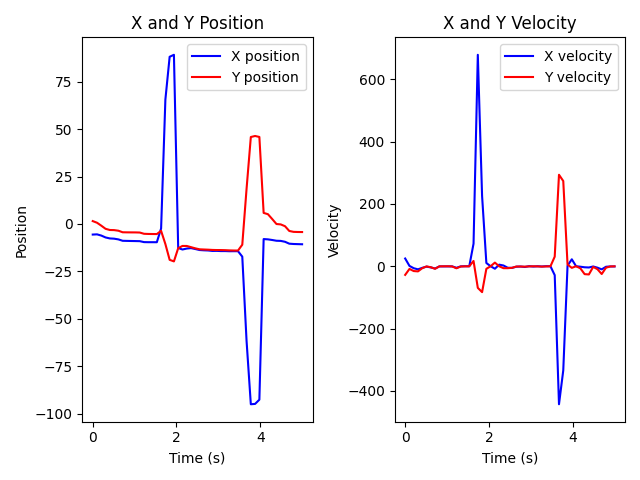

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Visualize kinematics
# Create subplots with improved visual clarity
fig, axes = plt.subplots(1, 2)

# Randomly select 50 points from the DataFrame
random_val = np.random.randint(df_regression.shape[0] - 50)
random_indices = list(range(random_val, random_val+50))

# Extract the corresponding rows for X and Y positions and velocities
df_regression_sample = df_regression.loc[random_indices].sort_index()

# Time conversion: Each point corresponds to 100 ms, converting it to seconds
time_in_seconds = np.linspace(0,5,50)

# Plot X and Y position with different colors
axes[0].plot(time_in_seconds, df_regression_sample['X_1'], label='X position',color='b')
axes[0].plot(time_in_seconds, df_regression_sample['X_2'], label='Y position', color='r')
axes[0].set_title('X and Y Position')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Position')
axes[0].legend()

# Plot X and Y velocity with different colors
axes[1].plot(time_in_seconds, df_regression_sample['X_3'], label='X velocity',color='b')
axes[1].plot(time_in_seconds, df_regression_sample['X_4'], label='Y velocity',color='r')
axes[1].set_title('X and Y Velocity')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Velocity')
axes[1].legend()

plt.tight_layout()
plt.show()

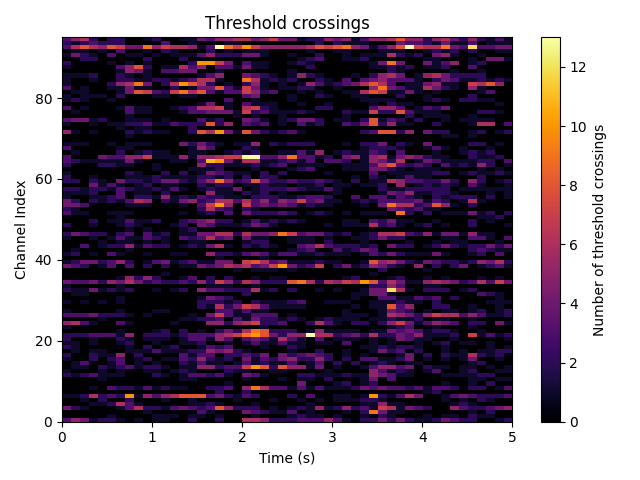

In [27]:
# Visualize neural data
# Create the spectrogram (heatmap) plot for channel data
fig, ax = plt.subplots()

channel_data = df_regression_sample.filter(like='channel')

# Plotting the heatmap
cax = ax.imshow(channel_data.T, aspect='auto', cmap='inferno', origin='lower',
                extent=[time_in_seconds.min(), time_in_seconds.max(), 0, channel_data.shape[1]])

# Add colorbar and labels
cbar = fig.colorbar(cax, orientation='vertical', pad=0.05)
cbar.set_label('Number of threshold crossings')
ax.set_title('Threshold crossings')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channel Index')

plt.tight_layout()
plt.show()

## Linear regression
In the simplest case, linear regression aims to fit a line to the data points in such a way that the sum of the squared differences between the observed (grount truth) and predicted values is minimized.

After fitting a linear model to the data (a.k.a. training the model), we can pass new data through the model to predict the corresponding outputs. In the context of neuroprosthetics, it is common to use linear models that take in the neural feature (the independent variable), and try to predict behavior (dependent variable).

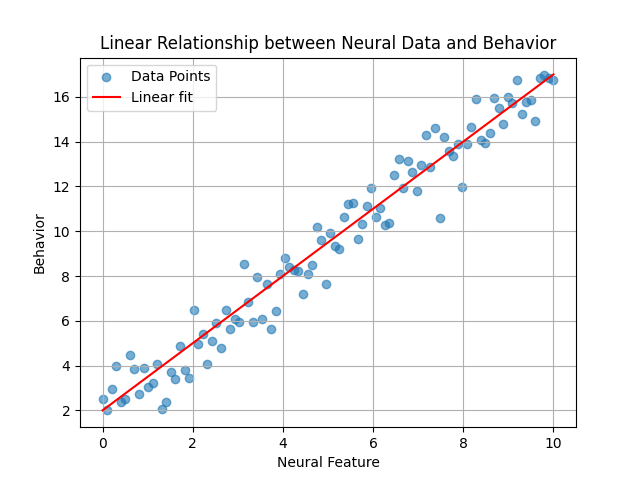

In [19]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(42)

# Generating synthetic neural data (independent variable)
neural_data = np.linspace(0, 10, 100)

# Generating a linear relationship with behavior (dependent variable)
# Adding some random noise to simulate real-world data
slope = 1.5
intercept = 2
noise = np.random.normal(0, 1, neural_data.shape)
behavior = slope * neural_data + intercept + noise

# Plotting the data
plt.figure()
plt.scatter(neural_data, behavior, label='Data Points', alpha=0.6)
plt.plot(neural_data, slope * neural_data + intercept, color='red', label='Linear fit')
plt.xlabel('Neural Feature')
plt.ylabel('Behavior')
plt.title('Linear Relationship between Neural Data and Behavior')
plt.legend()
plt.grid(True)
plt.show()

The objective in a linear regression is to find the line that minimizes the prediction error across all the data points. Thus, the objective function to minimize looks like this:

$MSE = \frac{1}{n} \sum_{i=1}^{n} ||y_i - \hat{y}_i||^2$

Where $y_i$ corresponds to the ground truth data, and $y_i$ to the prediction. In matrix form, this corresponds to:

$MSE = \frac{1}{n}||Y - \hat{Y}||^2$

We can then restrict the model to be linear,

$Y=XW+b$

Where W corresponds to the weights, and b to a bias term.

The values of W and b that minimize the mean squared error of the reconstruction, correspond to:

$W=(X^TX)^{-1}X^TY$

$b = \frac{1}{n}\sum_{i=1}^n(y_i-W^Tx_i)$

### Application

Let's now use a linear regression to predict reaching kinematics from a monkey with an intracortical electrode array.

To improve the accuracy of the prediction, we can add history as more input features. Play around with the amount of history to use and explore how the accuracy of the prediction changes!

Average correlation between ground truth and prediction: 0.87
Average mean squared error: 1546.4048


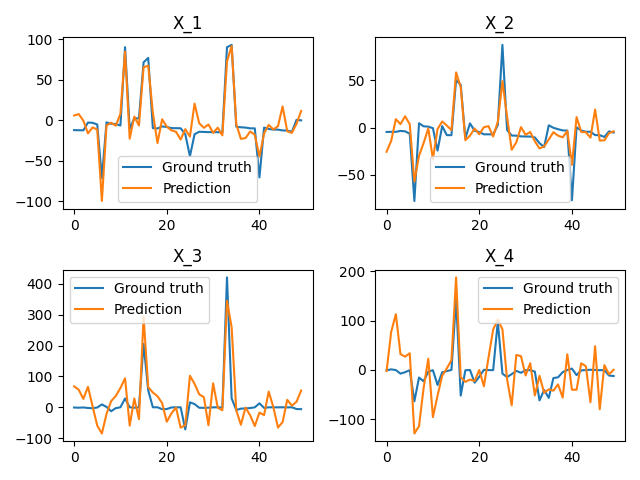

In [36]:
# @title Linear regression with history { run: "auto" }
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings("ignore")

# Load reaching dataset
df_regression = pd.read_csv("/content/regression_dataset.csv")

def add_history(dataframe, history):
  channel_columns = [col for col in dataframe.columns if 'channel' in col]
  new_columns = []
  for col in channel_columns:
      for h in range(1, history + 1):
          new_col_name = f"{col}_hist_{h}"
          dataframe[new_col_name] = dataframe[col].shift(h)
          new_columns.append(new_col_name)
  dataframe.dropna(inplace=True)

# Add history
history = 4 #@param{type:"slider", min:1.0, max:5, step:1}
add_history(df_regression, history)

# Separate dataset into training and testing
regression_train=df_regression.sample(frac=0.8,random_state=200)
regression_test=df_regression.drop(regression_train.index)
X_train = regression_train.filter(like="channel").to_numpy()
Y_train = regression_train.filter(like="X").to_numpy()
X_test = regression_test.filter(like="channel").to_numpy()
Y_test = regression_test.filter(like="X").to_numpy()

# Compute W and b using the training set
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
b = (Y_train - X_train @ W).mean(axis=0)

# Compute prediction of the test set
Y_test_hat = X_test @ W + b

# Calc error
corr = np.diag(np.corrcoef(Y_test, Y_test_hat, rowvar=False)[:4, 4:])
mse = np.square(Y_test - Y_test_hat).mean()
print(f"Average correlation between ground truth and prediction: {corr.mean():.2f}")
print(f"Average mean squared error: {mse:.4f}")

# Show results (plot and values)
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()

# Plot each column from both arrays in a separate subplot
# Plot only the first 5 seconds
for i in range(4):
    axs[i].plot(Y_test[:50, i], label=f'Ground truth')
    axs[i].plot(Y_test_hat[:50, i], label=f'Prediction')
    axs[i].set_title(f'X_{i+1}')
    axs[i].legend()

# Display the figure
plt.tight_layout()
plt.show()

## Neural Network regression

The problem with modelling the relationship between brain activity and output with a linear model, is that it is not biologically accurate. There are **complex, non-linear pathways between where the intended behavior gets generated in the brain and how it actually translates to real behavior**. For example, to generate voluntary movement of the hand, upper motor neurons in hand area of the motor cortex communicate (via action potentials) with lower motor neurons in the spinal cord, many times going through some interneurons in the process. This process is highly non-linear.

<img src="https://drive.google.com/uc?export=view&id=16G1AmKG4yarv1x-1wVfHSw-0MRUtgBfz" alt="drawing" width="600"/>

This is one of the reasons why neural networks have gotten traction in the brain-machine interface field, as they allow for **modelling arbitrarily complex and non-linear relationships** between input and output. Let's take a quick look at how they work.

### Theoretical background

<img src="https://drive.google.com/uc?export=view&id=16QE29NR2_lqaPH9fsgljX7EfMehd9m3G" alt="drawing" width="400"/>

Artificial neural networks originated as a way of replicating what our biological neural networks do naturally: process input information to produce an output. Similar to what happens in the brain, we have neurons (nodes in the graph above) that connect to other neurons (connections in the graph above). Mathematically, this is modelled as neurons that can have different numerical values (which represents their activation), and these values are passed through to other neurons via weights in the connections. Thus, a forward pass of a neural network (represented in the gif below) works the following way:

1.** N-dimensional input is passed through to the first layer of neurons**: each neuron is set to the corresponding value of the input.
2. The weights of the connections are used to **multiply and sum** the values of the first layer of neurons, to generate values for the second layer of neurons.
3. An **activation function** takes in the generated values and determines the final value of each of the second layer neurons. This is where the non-linearity is added to the model.
4. This process is repeated until we get to the final layer of neurons, and the final value of each of these neurons represents the output of the network, given a certain input.

<img src="https://drive.google.com/uc?export=view&id=16JBRKN_JdeKpUX3FDc7wkl4Ud8A5SDJs" alt="drawing" width="800"/>

We can structure artificial neural networks depending on the type of task we want to solve. For example, for classification, as shown in the gif above, we can make each output neuron represent a class out of a finite number of them (for example, determining whether an input image is a cat or a dog), and then we assign the class to the input depending on which neuron had the highest activation. For regression problems we instead try to get the output neurons to directly predict the continuous variable we are interested in.

How do we make the networks do what we want? We won't go into too much detail here, but the general idea is trying to tune the neural network **weights** so that, when passing an input through the network, the generated output is close to the ground-truth output. To do this, we pass training examples through the network and see how much error (compared to the ground truth output) it has and update the weights to minimize this error.

### Application

Now, let's try a simple neural network to predict behavior from neural data, and see if we can outperform the simple linear regression. For this example we will be using [Keras](https://keras.io/), a very simple Python library that allows for quick prototyping of neural networks.

Play around with the hyperparameters (history, size of the hidden layer, activation function, epochs). How good can your predictions be?

In [44]:
# @title Network training
import tensorflow as tf

# Add history
history = 3 #@param{type:"slider", min:1.0, max:5, step:1}
df_regression = pd.read_csv("/content/regression_dataset.csv")
add_history(df_regression, history)

# Separate dataset into training and testing
regression_train=df_regression.sample(frac=0.8,random_state=200)
regression_test=df_regression.drop(regression_train.index)
X_train = regression_train.filter(like="channel").to_numpy()
Y_train = regression_train.filter(like="X").to_numpy()
X_test = regression_test.filter(like="channel").to_numpy()
Y_test = regression_test.filter(like="X").to_numpy()

# Define the model
size_of_hidden_layer = 50 # @param {type: 'slider', min:10, max:500, step:5}
activation_function = "relu" # @param ["relu", "tanh", "sigmoid"]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(size_of_hidden_layer, activation=activation_function, input_shape=(X_train.shape[1],)),  # Hidden layer
    tf.keras.layers.Dense(4, activation='linear')  # Output layer of size 4
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 2 # @param {type: 'slider', min:1, max:20, step:1}
model.fit(X_train, Y_train, epochs=epochs)

# Predict
Y_test_hat = model.predict(X_test)

Epoch 1/2
786/786 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5063.7207
Epoch 2/2
786/786 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1792.8300
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Average correlation between ground truth and prediction: 0.88
Average mean squared error: 1086.3335


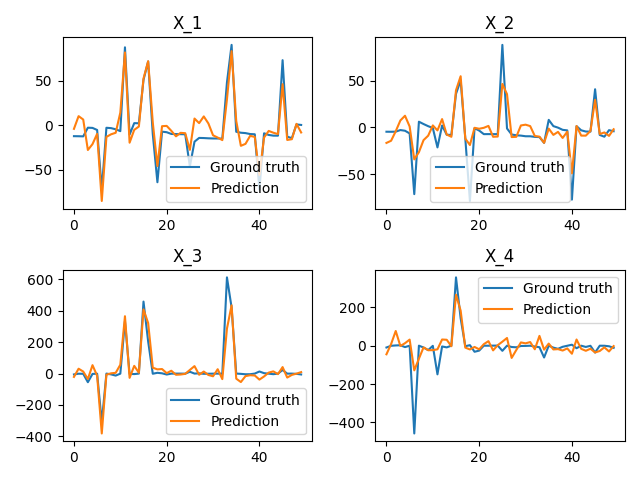

In [45]:
# @title Evaluate model
# Show results (plot and values)
corr = np.diag(np.corrcoef(Y_test, Y_test_hat, rowvar=False)[:4, 4:])
mse = np.square(Y_test - Y_test_hat).mean()
print(f"Average correlation between ground truth and prediction: {corr.mean():.2f}")
print(f"Average mean squared error: {mse:.4f}")
fig, axs = plt.subplots(2, 2)
# Flatten the axes for easier indexing
axs = axs.flatten()

# Plot each column from both arrays in a separate subplot
for i in range(4):
    axs[i].plot(Y_test[:50, i], label=f'Ground truth')
    axs[i].plot(Y_test_hat[:50, i], label=f'Prediction')
    axs[i].set_title(f'X_{i+1}')
    axs[i].legend()

# Display the figure
plt.tight_layout()
plt.show()

# Classification Models (Brief Intro)




<!-- <img src="https://drive.google.com/uc?export=view&id=1rGmcjYq9h-0fGAGcKEltVq5hyvfNsvwj" alt="drawing" width="500"/> -->

In classification, the model's job is to decide which discrete class the data belong to. For example, given a sample of neuron data, we might try to classify which finger is moving, or what word is being said.

In the figure below, we plot the features for two classes, where "feature 1" and "feature 2" could be the firing rates of two different neurons. We can classify red vs blue by simply drawing line between clusters, and classify which side of the line each point is on. In this case we could use a _Linear Discriminant Analysis_ (LDA) classifier or a _Logistic Regression_ classifier.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1KkmXW9AwyLM6eJBsw3CzVGzoGeX-qZar" alt="drawing" width="400"/></p>

However, sometimes there is a nonlinear relationship between features and the classes. In the example below, we can't draw a straight line to accurately classify red vs blue. We'd need a nonlinear classification algorithm. Some algorithms we could use are a _support vector machine_, _K-nearest neighbors_, or a neural network.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1gRXNpq2Cm22GWHX5RGYu_QeDO-Rt0uvM" alt="drawing" width="400"/></p>

<br>

**Neural Networks for Classification:**

When we use a neural network for classification, we have the network output the probability of each class. In example below, the network chooses between 3 output classes. Since the second class has the highest probability (60%), the final output is "class 2". During training, the network is encouraged to have high probability for the correct class and low probability for the wrong classes.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1ghXykcSZ_UGDm4iAIHfB1Lqm3IWQfHZw" alt="drawing" width="300"/></p>


# Model Validation

<!-- If we have time -->

Model validation is an essential step in the machine learning process to ensure that our model performs well on unseen data. Typically, we split our dataset into three parts:
- ***training set***: used to train the model. Usually about 70% of the data.
- ***validation set***: used to tune the model's hyperparameters and prevent overfitting. Usually about 10-20% of the data.
- ***test set***: provides an unbiased evaluation of the model's performance on new data. Usually about 10-20% of the data.

It's important to remember that simply achieving high accuracy on the training data does not guarantee a model's effectiveness. Overfitting occurs when a model is too closely tailored to the training data, making it perform poorly on new data. By using a validation set, we can adjust the model in response to its performance on unseen data, ensuring it captures the underlying patterns and relationships rather than memorizing the training data. Once satisfied with its validation performance, we use the test set for a final evaluation, reinforcing our confidence in the model's ability to generalize.

# Datasets (sneak peek)

[Presentation](https://docs.google.com/presentation/d/1rtfT4tDmGK-IQ8GgN9XEdzI7Mi-cJwZRSSd036Wgvew/edit?usp=sharing)